# 1. Installing Libraries

In [1]:
#!pip3 install numpy
#!pip3 install pandas
#!pip3 install scikit-learn


# 2. Importing libraries

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# 3. Reading the IP Enriched NSL-KDD Datasets for visualization

In [3]:
# Read a comma-separated values (csv) file into DataFrame
# data has already the column names. so we dont need to assign feature names during importing csv files
# Do we need TEST DATA ???
train_data=pd.read_csv('train_ip_config_A.csv')
test_data=pd.read_csv('test_ip_config_A.csv')


# 4.Extract IPs into a new DF

In [4]:


df_ips_train = pd.DataFrame()
df_ips_train['ip_src'] = train_data['ip_src']
df_ips_train['ip_dest'] = train_data['ip_dest']

# 5. Plotting graphs with various layouts

## 5.1 Directional Graph / Spring Layout

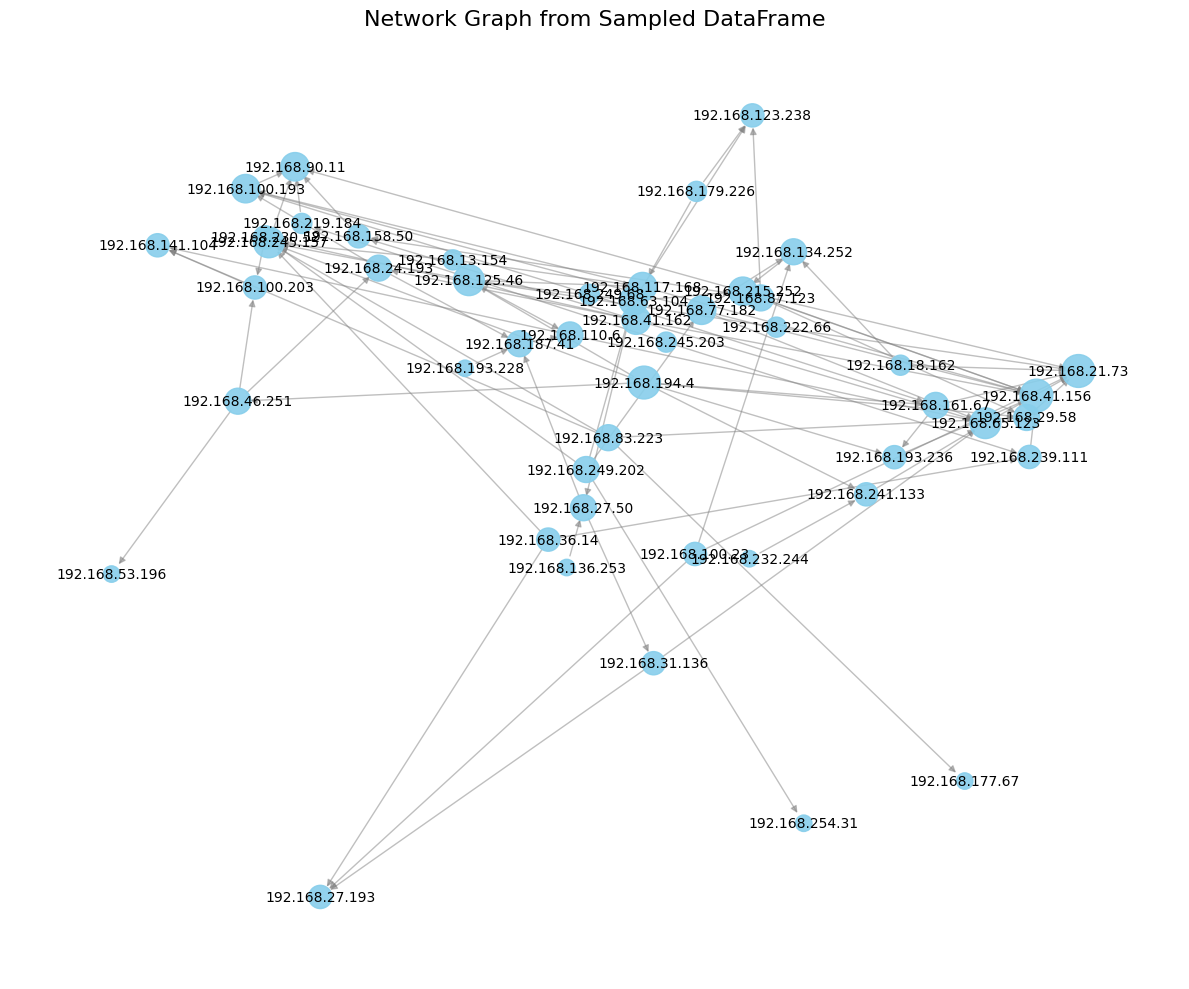

In [15]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Sample a larger subset of the DataFrame (e.g., 100 random records)
df_ips = df_ips_train.sample(n=min(100, len(df_ips_train)), random_state=42)

# Create a directed graph from the sampled data
G_directed = nx.from_pandas_edgelist(df_ips, 'ip_src', 'ip_dest', create_using=nx.DiGraph())

# Visualize the graph
pos = nx.spring_layout(G_directed, seed=42, k=0.2)  # Increase 'k' for more spacing between nodes
plt.figure(figsize=(12, 10))  # Maintain a large figure size for better visibility

# Draw nodes with adjusted size based on degree centrality
node_sizes = [70 + 70 * G_directed.degree(node) for node in G_directed.nodes()]  # Increased node size
nx.draw_networkx_nodes(G_directed, pos, node_size=node_sizes, node_color="skyblue", alpha=0.9)

# Draw edges with custom width
nx.draw_networkx_edges(G_directed, pos, width=1.0, edge_color="gray", alpha=0.5)

# Draw labels with slightly larger font size
label_font_size = 10  # Increased font size for better readability
nx.draw_networkx_labels(G_directed, pos, font_size=label_font_size, font_color='black')

# Set background color
plt.gca().set_facecolor('lightgray')

# Customize axes
plt.axis('off')  # Turn off the axis
plt.title("Network Graph from Sampled DataFrame", fontsize=16)
plt.tight_layout()  # Adjust layout to fit labels

# Show the plot
plt.show()





## 5.2 Graph with communities / Spring Layout

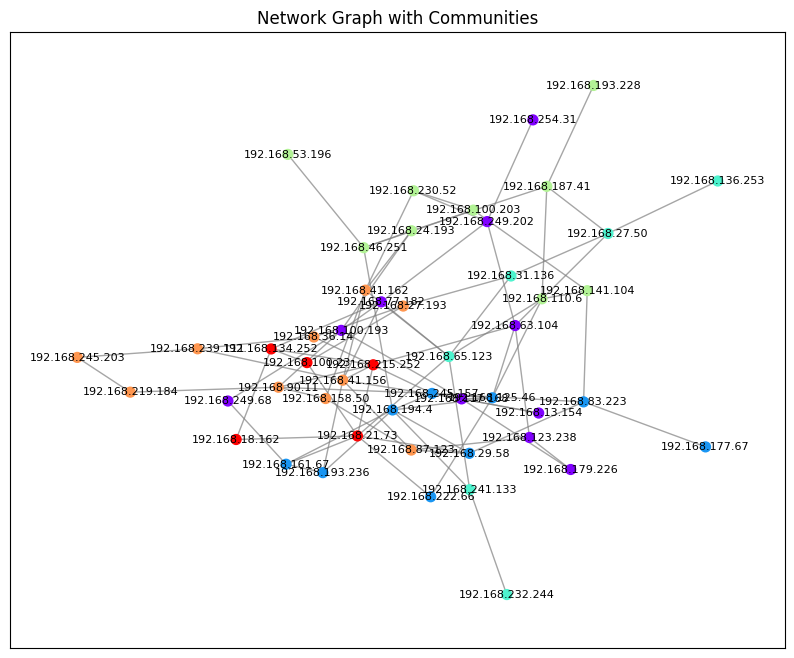

In [16]:
import networkx as nx
import matplotlib.pyplot as plt
import community  # This is the python-louvain library
import community.community_louvain as cl


# Create an undirected graph
G = nx.from_pandas_edgelist(df_ips, 'ip_src', 'ip_dest', create_using=nx.Graph())

# Detect communities using Louvain method
communities = community.best_partition(G)

# Visualize the graph with communities
pos = nx.spring_layout(G)
plt.figure(figsize=(10, 8))

# Draw nodes with community colors
nx.draw_networkx_nodes(G, pos, node_size=50, cmap=plt.cm.rainbow, node_color=list(communities.values()))
nx.draw_networkx_edges(G, pos, edge_color="gray", alpha=0.7)
nx.draw_networkx_labels(G, pos, font_size=8)

plt.title("Network Graph with Communities")
plt.show()

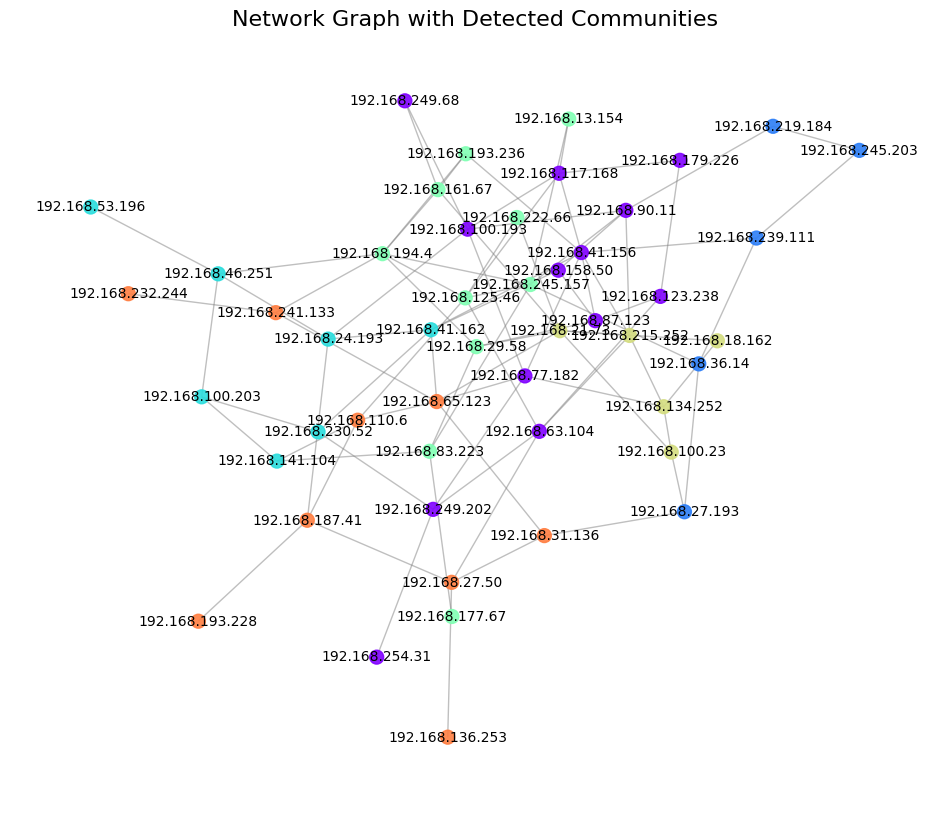

In [39]:
import networkx as nx
import matplotlib.pyplot as plt
import community  # This is the python-louvain library

# Create an undirected graph
G = nx.from_pandas_edgelist(df_ips, 'ip_src', 'ip_dest', create_using=nx.Graph())

# Detect communities using the Louvain method
communities = community.best_partition(G)

# Prepare color mapping for communities
unique_communities = set(communities.values())
color_map = {community_id: plt.cm.rainbow(i / len(unique_communities)) for i, community_id in enumerate(unique_communities)}

# Visualize the graph with communities
pos = nx.spring_layout(G, k=0.15, seed=42)  # Adjust 'k' for spacing
plt.figure(figsize=(12, 10))  # Increase figure size for clarity

# Draw nodes with community colors
node_color = [color_map[communities[node]] for node in G.nodes()]  # Use color map
nx.draw_networkx_nodes(G, pos, node_size=100, node_color=node_color, alpha=0.9)

# Draw edges and labels
nx.draw_networkx_edges(G, pos, edge_color="gray", alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=10)

# Title and display
plt.title("Network Graph with Detected Communities", fontsize=16)
plt.axis('off')  # Hide the axes for a cleaner look
plt.show()


/var/folders/99/w99s3w4s4rlfq1shyqtsqrqm0000gq/T/ipykernel_67471/2577945429.py:29: UserWarning: 

The connectionstyle keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default values.
Note that using FancyArrowPatches may be slow for large graphs.

  nx.draw_networkx_edges(G, pos, edgelist=[edge], connectionstyle=f"arc3,rad={rad}", edge_color="gray", alpha=0.5)


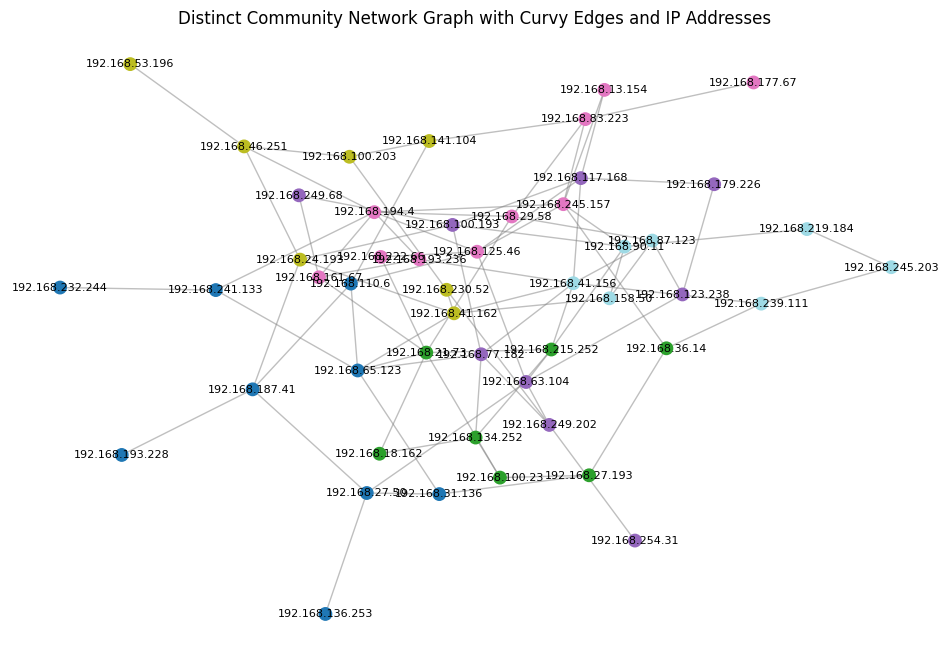

In [46]:
import networkx as nx
import matplotlib.pyplot as plt
import community  # python-louvain library for community detection
import numpy as np

# Create an undirected graph from a DataFrame
G = nx.from_pandas_edgelist(df_ips, 'ip_src', 'ip_dest', create_using=nx.Graph())

# Detect communities using the Louvain method
communities = community.best_partition(G)

# Create a list of unique communities and assign each node a color based on its community
unique_communities = list(set(communities.values()))
color_map = [unique_communities.index(communities[node]) for node in G.nodes()]

# Generate positions for the graph using spring layout with a higher k-value for more spread-out nodes
pos = nx.spring_layout(G, k=0.25, seed=42)  # Increased k-value to separate communities more

# Create a plot
plt.figure(figsize=(12, 8))

# Draw nodes with colors based on communities and ensure a clear color distinction
nx.draw_networkx_nodes(G, pos, node_color=color_map, node_size=80, cmap=plt.cm.tab20)

# Draw curvy edges between nodes
for edge in G.edges():
    src, dest = edge
    rad = np.random.uniform(0.8, 2.0)  # Increased curvature to separate edges more
    nx.draw_networkx_edges(G, pos, edgelist=[edge], connectionstyle=f"arc3,rad={rad}", edge_color="gray", alpha=0.5)

# Draw IP address labels for each node
nx.draw_networkx_labels(G, pos, labels={node: node for node in G.nodes()}, font_size=8)

# Set title and remove axis for a cleaner display
plt.title("Distinct Community Network Graph with Curvy Edges and IP Addresses")
plt.axis('off')
plt.show()






In [13]:
## 5.3 Graph with communities / Pyvis layout  HTML view

In [17]:
import networkx as nx
from pyvis.network import Network

# Assuming your DataFrame is named df_ips with columns 'ip_src' and 'ip_dest'
# Replace df_ips with the actual name of your DataFrame

# Create an undirected graph
G = nx.from_pandas_edgelist(df_ips, 'ip_src', 'ip_dest', create_using=nx.Graph())

# Detect communities using Louvain method
communities = community.best_partition(G)

# Create a Pyvis Network instance
net = Network(notebook=True)

# Add nodes with community colors
for node, community_id in communities.items():
    net.add_node(node, color=community_id, label=str(node))

# Add edges
for edge in G.edges():
    net.add_edge(edge[0], edge[1])

# Show the interactive graph
net.show_buttons(filter_=['nodes', 'edges', 'physics'])

file_path= "NSLKDD_ip_relations.html"
net.show(file_path)


NSLKDD_ip_relations.html


In [84]:
## 5.4 Bi-partite graph/ non directed

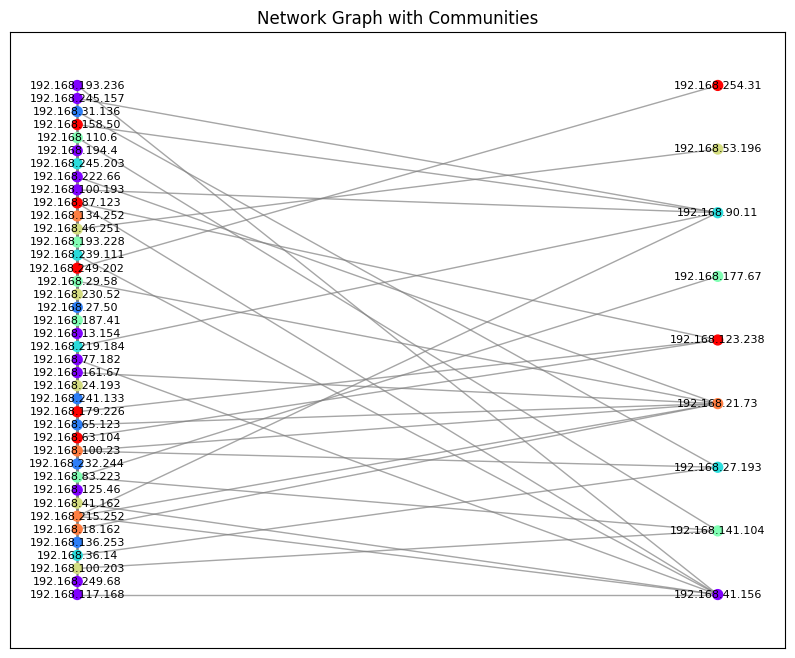

In [18]:
# Create an undirected graph
G = nx.from_pandas_edgelist(df_ips, 'ip_src', 'ip_dest', create_using=nx.Graph())

# Detect communities using Louvain method
communities = community.best_partition(G)

# Visualize the graph with communities
pos = nx.bipartite_layout(G, df_ips['ip_src'].unique())
plt.figure(figsize=(10, 8))

# Draw nodes with community colors
nx.draw_networkx_nodes(G, pos, node_size=50, cmap=plt.cm.rainbow, node_color=list(communities.values()))
nx.draw_networkx_edges(G, pos, edge_color="gray", alpha=0.7)
nx.draw_networkx_labels(G, pos, font_size=8)

plt.title("Network Graph with Communities")
plt.show()

# 6. Calculate centralities

In [19]:
G = nx.from_pandas_edgelist(df_ips, 'ip_src', 'ip_dest', create_using=nx.DiGraph())

In [20]:
degree_centrality = nx.degree_centrality(G)

In [21]:
in_degree_centrality = nx.in_degree_centrality(G)

In [22]:
out_degree_centrality = nx.out_degree_centrality(G)

In [23]:
betweennes_centrality =  nx.betweenness_centrality(G)
# shows the critical IP addresses. If this IP fails netwrok connection will fail.

In [24]:
closeness_centrality = nx.closeness_centrality(G)
# how quickly an IP address can transmit a malware

In [25]:
degree_df =  pd.DataFrame(list(degree_centrality.items()), columns=['ip_src', 'degree_centrality'])

In [26]:
in_degree_df =  pd.DataFrame(list(in_degree_centrality.items()), columns=['ip_src', 'in_degree_centrality'])

In [27]:
out_degree_df =  pd.DataFrame(list(out_degree_centrality.items()), columns=['ip_src', 'out_degree_centrality'])

In [28]:
#df_ips_centralities =  pd.merge(df_ips, degree_df, on='ip_src', how='left')
#df_ips_centralities =  pd.merge(df_ips_centralities, in_degree_df, on='ip_src', how='left')
#df_ips_centralities =  pd.merge(df_ips_centralities, out_degree_df, on='ip_src', how='left')
#df_ips_centralities.drop(columns=['ip_dest'], inplace=True)

In [29]:
train_data =  pd.merge(train_data, degree_df, on='ip_src', how='left')


In [30]:
train_data =  pd.merge(train_data, in_degree_df, on='ip_src', how='left')


In [31]:
train_data =  pd.merge(train_data, out_degree_df, on='ip_src', how='left')

In [32]:
train_data.shape

(125697, 49)

In [33]:
# export train data as a csv
train_data.to_csv('train_ip_config_A_centralities.csv', index=False)

In [34]:
# Below we are repeating the same for test data


In [35]:
test_data=pd.read_csv('test_ip_config_A.csv')
df_ips_test = pd.DataFrame()
df_ips_test['ip_src'] = train_data['ip_src']
df_ips_test['ip_dest'] = train_data['ip_dest']

G = nx.from_pandas_edgelist(df_ips_test, 'ip_src', 'ip_dest', create_using=nx.DiGraph())
degree_centrality = nx.degree_centrality(G)
in_degree_centrality = nx.in_degree_centrality(G)
out_degree_centrality = nx.out_degree_centrality(G)

degree_df =  pd.DataFrame(list(degree_centrality.items()), columns=['ip_src', 'degree_centrality'])
in_degree_df =  pd.DataFrame(list(in_degree_centrality.items()), columns=['ip_src', 'in_degree_centrality'])
out_degree_df =  pd.DataFrame(list(out_degree_centrality.items()), columns=['ip_src', 'out_degree_centrality'])

test_data =  pd.merge(test_data, degree_df, on='ip_src', how='left')
test_data =  pd.merge(test_data, degree_df, on='ip_src', how='left')
test_data =  pd.merge(test_data, out_degree_df, on='ip_src', how='left')


In [36]:
test_data.to_csv('test_ip_config_A_centralities.csv', index=False)

In [37]:
test_data.tail()

,Unnamed: 0,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,...,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,difficulty_level,ip_src,ip_dest,degree_centrality_x,degree_centrality_y,out_degree_centrality
22303,22303,0,tcp,finger,SF,5,134,0,0,0,...,0.0,0.00,0.0,normal,21,192.168.100.193,192.168.41.156,0.387755,0.387755,0.061224
22304,22304,0,tcp,http,SF,300,369,0,0,0,...,0.0,0.00,0.0,normal,21,192.168.29.58,192.168.158.50,0.489796,0.489796,0.061224
22305,22305,0,tcp,private,REJ,0,0,0,0,0,...,0.0,0.95,1.0,neptune,21,192.168.29.58,192.168.21.73,0.489796,0.489796,0.061224
22306,22306,0,udp,private,SF,53,54,0,0,0,...,0.0,0.00,0.0,normal,17,192.168.29.58,192.168.90.11,0.489796,0.489796,0.061224
22307,22307,0,tcp,http,SF,251,1264,0,0,0,...,0.0,0.00,0.0,normal,21,192.168.158.50,192.168.90.11,0.469388,0.469388,0.020408


In [38]:
import networkx as nx
import community  # This is the python-louvain library
import community.community_louvain as cl


# Create an undirected graph
G = nx.from_pandas_edgelist(df_ips_train, 'ip_src', 'ip_dest', create_using=nx.Graph())

# Detect communities using Louvain method
communities = community.best_partition(G)

communities_df = pd.DataFrame(list(communities.items()), columns=['ip_src', 'commnity_number' ])
communities_df.tail()

,ip_src,commnity_number
45,192.168.215.252,4
46,192.168.27.193,4
47,192.168.31.136,4
48,192.168.100.193,3
49,192.168.100.23,3
